In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
all_data = pd.read_csv('benchmarking_gat_01.csv')

In [3]:
all_data

,mean,min,q25,median,q75,max,std,num_tests,dataset,gat_type,time
0,0.7880,0.787,0.7875,0.788,0.7885,0.789,0.001000,2,cora,GATv2Conv,1.576
1,0.7860,0.756,0.7835,0.787,0.7922,0.813,0.014553,10,cora,GATv2Conv,7.860
2,0.7884,0.779,0.7800,0.785,0.7970,0.801,0.008980,5,cora,GATv2Conv,3.942


In [4]:
cora_app = all_data.loc[all_data['dataset'] == 'cora']

Creating Graph for Cora Data App - Accuracy Benchmarking

/var/folders/9t/fx1d82y17ld65ll42bk27zz40000gn/T/ipykernel_5986/1409133980.py:1: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  pagerank_app_mean = sns.lineplot(


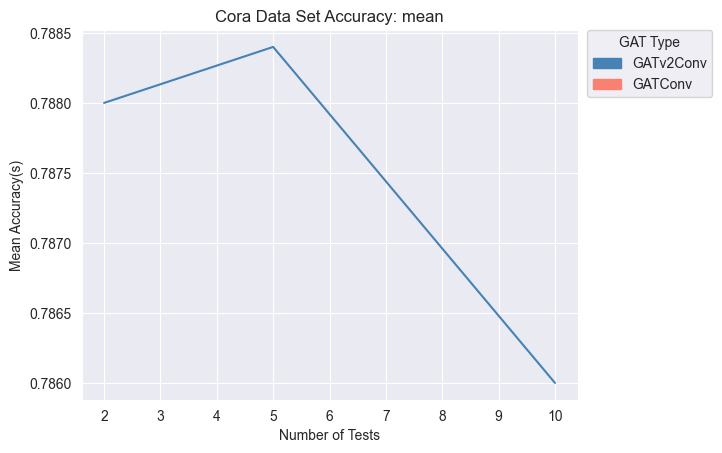

<Figure size 640x480 with 0 Axes>

In [5]:
pagerank_app_mean = sns.lineplot(
    data=cora_app,
    x="num_tests",
    y="mean",
    hue="gat_type",
    palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"])).set(title='Cora Data Set Accuracy: mean',
                                                                        xlabel='Number of Tests', 
                                                                        ylabel='Mean Accuracy(s)')

logless_logs = mpatches.Patch(color='SteelBlue', label='GATv2Conv')
manual_logs = mpatches.Patch(color='Salmon', label='GATConv')

plt.legend(handles=[logless_logs, manual_logs], title='GAT Type', bbox_to_anchor=(1.02, 1), loc='upper left',
           borderaxespad=0)


plt.show()
plt.savefig('cora_gat.png')

Adding a Mean Overhead metrics to the Benchmarking data

In [40]:
df = page_rank_app.sort_values(by=['app_name', 'num_tests', 'log_status'], ascending=True)
df['mean_overhead'] = df.groupby(['app_name', 'num_tests'], group_keys=True)['mean'].apply(lambda x: x.pct_change()*100).to_numpy()
df

,mean,min,q25,median,q75,max,std,log_status,num_tests,app_name,time,mean_overhead
11,1.002257,0.937195,0.969019,0.994205,1.011155,1.255663,0.048736,manual_log,100,301_pagerank,100.225714,NaN
5,1.019514,0.967146,0.994519,1.012593,1.028193,1.204288,0.040156,with_log,100,301_pagerank,101.951409,1.721809
10,1.023032,0.931865,0.963713,0.988082,1.035777,1.735371,0.102113,manual_log,1000,301_pagerank,1023.032496,NaN
4,1.034871,0.947117,0.987945,1.014887,1.047878,1.660801,0.081930,with_log,1000,301_pagerank,1034.871265,1.157223
7,0.934231,0.902950,0.911242,0.917168,0.961885,1.003114,0.026324,manual_log,2000,301_pagerank,1868.462984,NaN
1,1.012048,0.936298,0.985809,0.996844,1.007000,2.579394,0.091986,with_log,2000,301_pagerank,2024.096051,8.329470
8,0.914292,0.903425,0.910534,0.912991,0.915784,1.051474,0.007428,manual_log,3000,301_pagerank,2742.876943,NaN
2,0.955325,0.933344,0.941341,0.944555,0.955615,1.079705,0.022262,with_log,3000,301_pagerank,2865.973694,4.487870
9,0.913917,0.901551,0.910616,0.913145,0.916052,1.147792,0.006836,manual_log,4000,301_pagerank,3655.666686,NaN
3,0.944816,0.933474,0.941127,0.943510,0.946477,1.375074,0.009719,with_log,4000,301_pagerank,3779.265602,3.381023


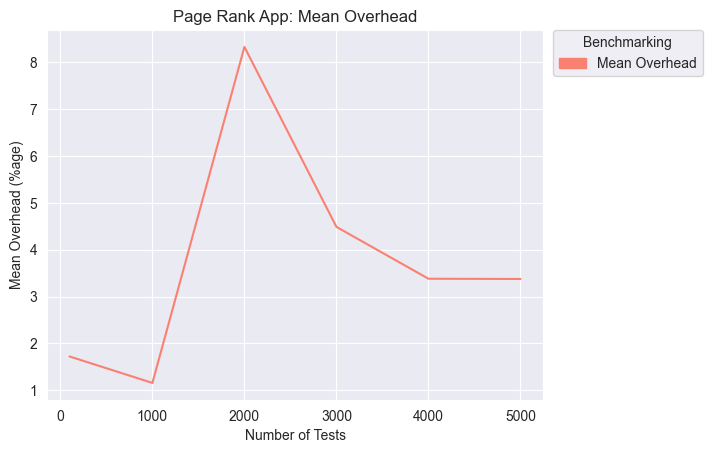

<Figure size 640x480 with 0 Axes>

In [41]:
pagerank_app_mean_overhead = sns.lineplot(
    data=df,
    x="num_tests",
    y="mean_overhead",
    hue="log_status",
    palette = sns.color_palette(palette = ["SteelBlue", "Salmon"])).set(title='Page Rank App: Mean Overhead',
                                                                         xlabel='Number of Tests',
                                                                         ylabel='Mean Overhead (%age)')

logless_logs = mpatches.Patch(color='Salmon', label='Mean Overhead')

plt.legend(handles=[logless_logs], title='Benchmarking', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()
plt.savefig('pagerank_app_mean_overhead.png')

In [42]:
rest_app = all_data.loc[all_data['app_name'] == '101_rest']

In [43]:
df = rest_app.sort_values(by=['app_name', 'num_tests', 'log_status'], ascending=False)
df['mean_overhead'] = df.groupby(['app_name', 'num_tests'], group_keys=True)['mean'].apply(lambda x: x.pct_change() * 100).to_numpy()
df


,mean,min,q25,median,q75,max,std,log_status,num_tests,app_name,time,mean_overhead
32,0.787290,0.752778,0.775457,0.784771,0.794388,1.480208,0.029029,without_log,5000,101_rest,3936.450620,NaN
26,0.899146,0.780344,0.815145,0.845025,0.973976,2.230121,0.121334,with_log,5000,101_rest,4495.730837,7.979236
31,0.789822,0.743619,0.773848,0.784368,0.796716,1.426957,0.030679,without_log,4000,101_rest,3159.289832,NaN
25,0.846275,0.781005,0.817636,0.833896,0.857418,1.828210,0.059583,with_log,4000,101_rest,3385.099548,3.224693
30,0.825001,0.756331,0.798977,0.817884,0.838923,1.344567,0.044781,without_log,3000,101_rest,2475.002920,NaN
24,0.843002,0.781925,0.812795,0.830804,0.857719,1.476072,0.053493,with_log,3000,101_rest,2529.006528,2.888338
34,0.786159,0.753103,0.775888,0.785052,0.794276,1.113955,0.016554,without_log,2000,101_rest,1572.318538,NaN
28,0.808866,0.779230,0.798009,0.808190,0.816273,1.152234,0.017305,with_log,2000,101_rest,1617.732418,2.181961
35,0.784611,0.756012,0.774776,0.784174,0.791735,1.090199,0.016870,without_log,1000,101_rest,784.610505,NaN
29,0.809912,0.777927,0.800224,0.808616,0.816861,1.093521,0.019541,with_log,1000,101_rest,809.911784,7.147483


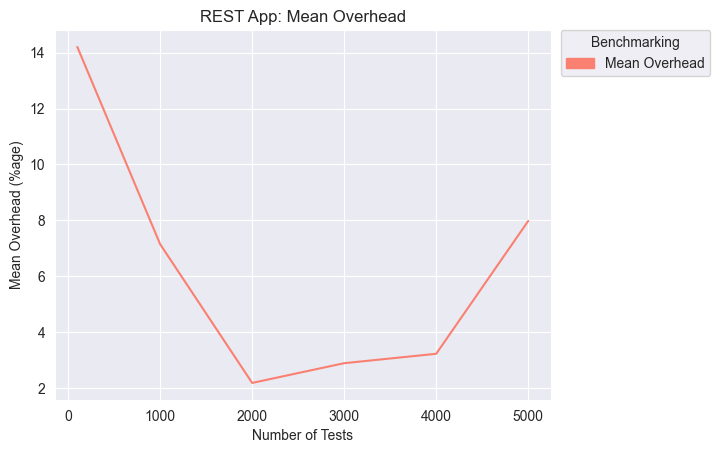

<Figure size 640x480 with 0 Axes>

In [44]:
rest_app_mean_overhead = sns.lineplot(
    data=df,
    x="num_tests",
    y="mean_overhead",
    hue="log_status",
    palette = sns.color_palette(palette = ["SteelBlue", "Salmon"])).set(title='REST App: Mean Overhead',
                                                                        xlabel='Number of Tests',
                                                                        ylabel='Mean Overhead (%age)')

logless_logs = mpatches.Patch(color='Salmon', label='Mean Overhead')

plt.legend(handles=[logless_logs], title='Benchmarking', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()
plt.savefig('REST_app_mean_overhead.png')

In [45]:
increamentor_app = all_data.loc[all_data['app_name'] == '103_increamentor']

In [46]:
df = increamentor_app.sort_values(by=['app_name', 'num_tests', 'log_status'], ascending=False)
df['mean_overhead'] = df.groupby(['app_name', 'num_tests'], group_keys=True)['mean'].apply(
    lambda x: x.pct_change() * 100).to_numpy()
df

,mean,min,q25,median,q75,max,std,log_status,num_tests,app_name,time,mean_overhead
21,0.543475,0.514763,0.523064,0.526288,0.547376,1.247756,0.049333,without_log,5000,103_increamentor,2717.376103,NaN
15,0.573551,0.563616,0.570835,0.572741,0.574698,0.832491,0.010140,with_log,5000,103_increamentor,2867.752824,8.962115
20,0.525997,0.517115,0.522245,0.523945,0.525967,0.998046,0.017567,without_log,4000,103_increamentor,2103.987097,NaN
14,0.576245,0.566462,0.572483,0.574455,0.576699,0.916768,0.016539,with_log,4000,103_increamentor,2304.981688,10.024778
19,0.526052,0.518377,0.523882,0.525689,0.527542,0.596213,0.003808,without_log,3000,103_increamentor,1578.156939,NaN
13,0.576162,0.564954,0.572483,0.574509,0.576938,1.046751,0.012829,with_log,3000,103_increamentor,1728.487143,9.498675
23,0.524928,0.517773,0.522747,0.524474,0.526449,0.592257,0.003975,without_log,2000,103_increamentor,1049.855170,NaN
17,0.574789,0.566975,0.571875,0.573547,0.575874,1.110427,0.014870,with_log,2000,103_increamentor,1149.577503,9.525682
18,0.526253,0.518703,0.523291,0.525209,0.527056,0.782083,0.011222,without_log,1000,103_increamentor,526.253030,NaN
12,0.579009,0.566422,0.573524,0.576133,0.580358,0.678650,0.011176,with_log,1000,103_increamentor,579.008727,9.553033


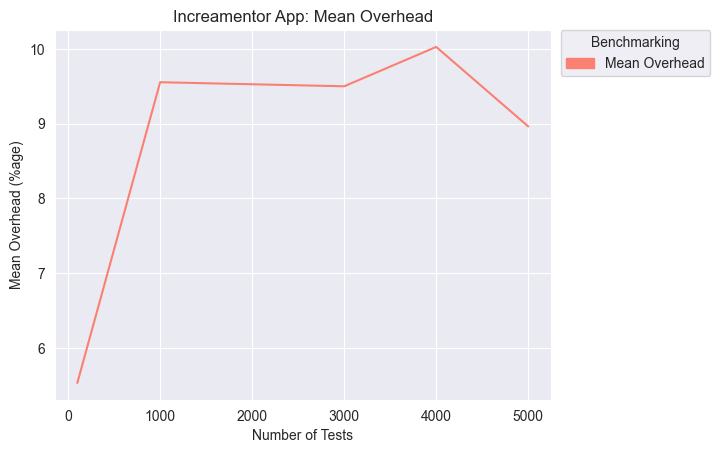

<Figure size 640x480 with 0 Axes>

In [48]:
increamentor_app_mean_overhead = sns.lineplot(
    data=df,
    x="num_tests",
    y="mean_overhead",
    hue="log_status",
    palette = sns.color_palette(palette = ["SteelBlue", "Salmon"])).set(title='Increamentor App: Mean Overhead',
                                                                        xlabel='Number of Tests',
                                                                        ylabel='Mean Overhead (%age)')

logless_logs = mpatches.Patch(color='Salmon', label='Mean Overhead')

plt.legend(handles=[logless_logs], title='Benchmarking', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()
plt.savefig('increamentor_app_mean_overhead.png')

In [ ]:
app2_manual_logging['mean']=app2_manual_logging['mean']/1000

In [ ]:
app2 = app2_df.append(app2_manual_logging)

In [ ]:
app2

In [ ]:
app2_mean = sns.lineplot(
    data=app2,
    x="num_tests",
    y="mean",
    hue="log_status",
    palette = sns.color_palette(palette = ["SteelBlue" , "Salmon","OliveDrab"])).set(title='App 2: mean',
                                                                        xlabel='Number of Tests',
                                                                        ylabel='Mean time(s)')

logless = mpatches.Patch(color='SteelBlue', label='With LogLess')
nologs = mpatches.Patch(color='Salmon', label='No Logs')
manuallog = mpatches.Patch(color='OliveDrab', label='Manual Logs')

plt.legend(handles=[logless, nologs,manuallog], title='Log Status',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()
plt.savefig('app2-mean.png')

In [ ]:
app3 = all_data.loc[all_data['app_name'] == 'app3']

In [ ]:
app3_mean = sns.lineplot(
    data=app3,
    x="num_tests",
    y="mean",
    hue="log_status",
    palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"])).set(title='App 3: mean',
                                                                        xlabel='Number of Tests',
                                                                        ylabel='Mean time(s)')

logless = mpatches.Patch(color='SteelBlue', label='With LogLess')
nologs = mpatches.Patch(color='Salmon', label='No Logs')

plt.legend(handles=[logless, nologs], title='Log Status', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()
plt.savefig('app3-mean.png')

In [ ]:
app4 = all_data.loc[all_data['app_name'] == 'app4']

In [ ]:
app4_mean = sns.lineplot(
    data=app4,
    x="num_tests",
    y="mean",
    hue="log_status",
    palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"])).set(title='App 4: mean',
                                                                        xlabel='Number of Tests',
                                                                        ylabel='Mean time(s)')

logless = mpatches.Patch(color='SteelBlue', label='With LogLess')
nologs = mpatches.Patch(color='Salmon', label='No Logs')

plt.legend(handles=[logless, nologs], title='Log Status', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()
plt.savefig('app4-mean.png')

In [ ]:
app5 = all_data.loc[all_data['app_name'] == 'app5']

In [ ]:
app5_mean = sns.lineplot(
    data=app5,
    x="num_tests",
    y="mean",
    hue="log_status",
    palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"])).set(title='App 5: mean',
                                                                        xlabel='Number of Tests',
                                                                        ylabel='Mean time(s)')

logless = mpatches.Patch(color='SteelBlue', label='With LogLess')
nologs = mpatches.Patch(color='Salmon', label='No Logs')

plt.legend(handles=[logless, nologs], title='Log Status', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()
plt.savefig('app5-mean.png')

In [ ]:
all_data = pd.read_csv('benchmarking_uid002.csv')
#all_data = all_data.append(app2_manual_logging)

In [ ]:
g = sns.FacetGrid(all_data, col='app_name',hue='log_status',sharey=False,palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"]))
g.map(sns.lineplot, "num_tests", "mean", legend = False).set(xlabel='Number of Tests',ylabel='Mean time(s)')

logless = mpatches.Patch(color='SteelBlue', label='With LogLess')
nologs = mpatches.Patch(color='Salmon', label='No Logs')

plt.legend(handles=[logless, nologs], title='Log Status',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.show()
plt.savefig('all-mean-line.png')

In [ ]:
g = sns.catplot(
    data=all_data, kind="bar",
    x="num_tests", y="mean", hue="log_status", col='app_name',errorbar=None, sharey=False,
    palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"])
).set(xlabel='Number of Tests',ylabel='Mean time(s)')

logless = mpatches.Patch(color='SteelBlue', label='With LogLess')
nologs = mpatches.Patch(color='Salmon', label='No Logs')

plt.legend(handles=[logless, nologs], title='Log Status',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()
plt.savefig('all-mean-bar.png')